<h1> Healthcare Analysis</h1>
this analysis is referrence from my school project

<h3>Tools/software use</h3>

<ul>
    <li>Knime Analytics Platform</li>
    <li>Jupyter notebook</li>
</ul>
<h4>The dataset for this project is from <a href="https://data.gov.sg/">data.gov.sg</a></h4>

<h3>Basic data Exploration</h3>



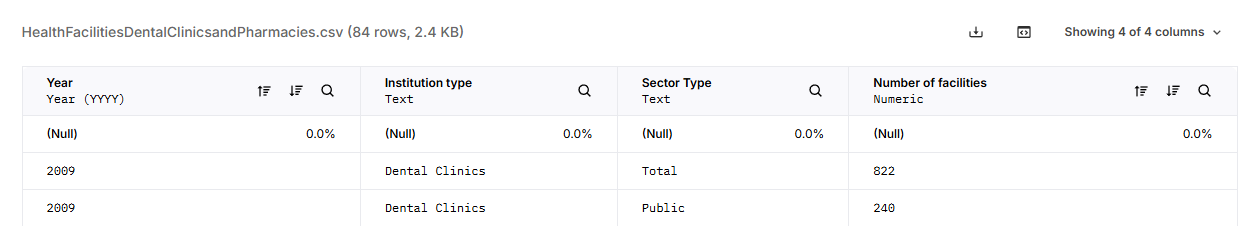
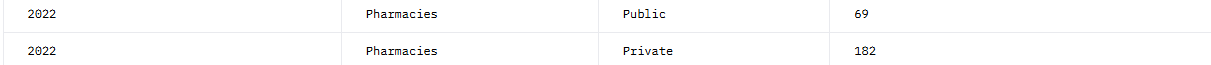

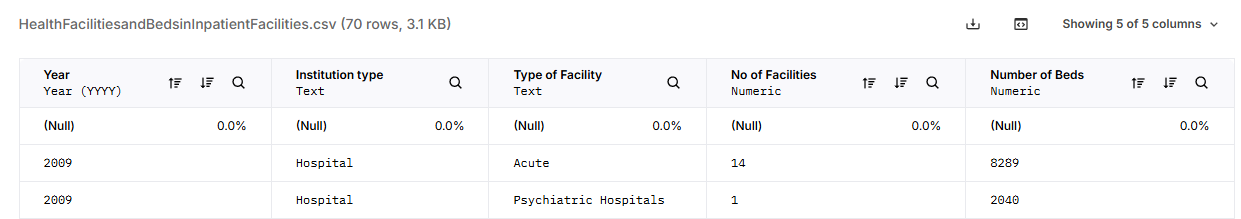
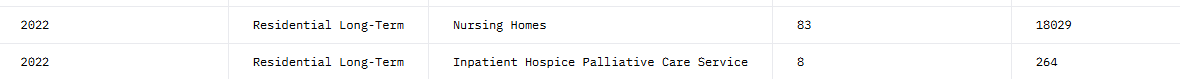

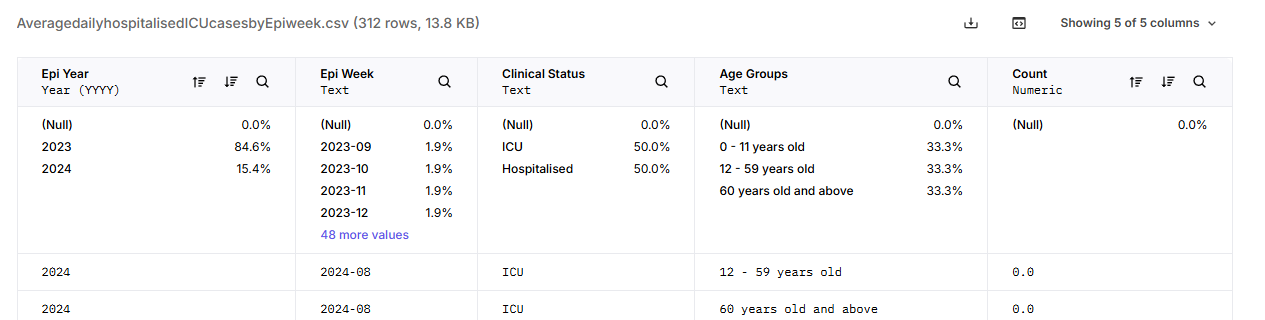
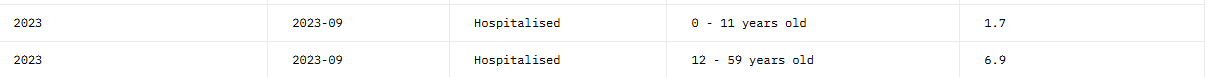

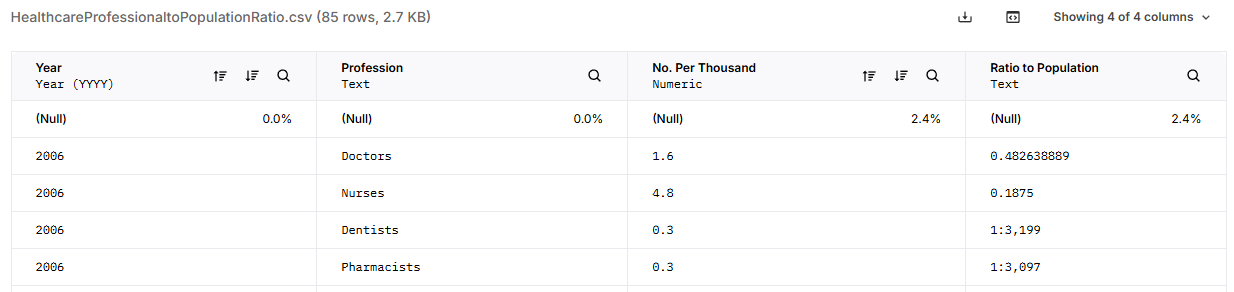
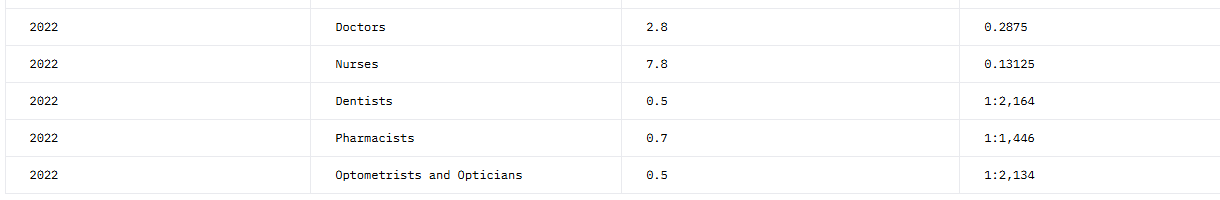

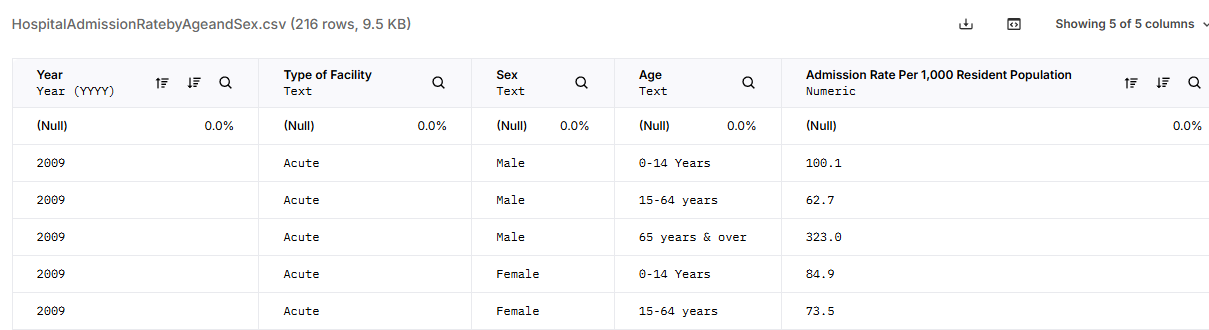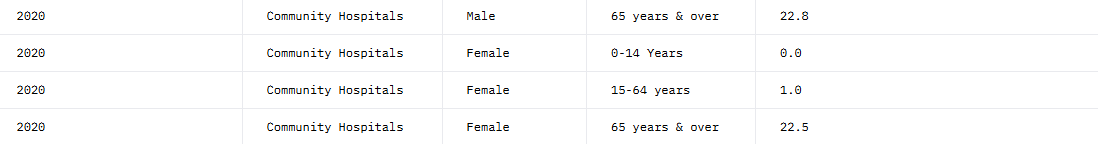

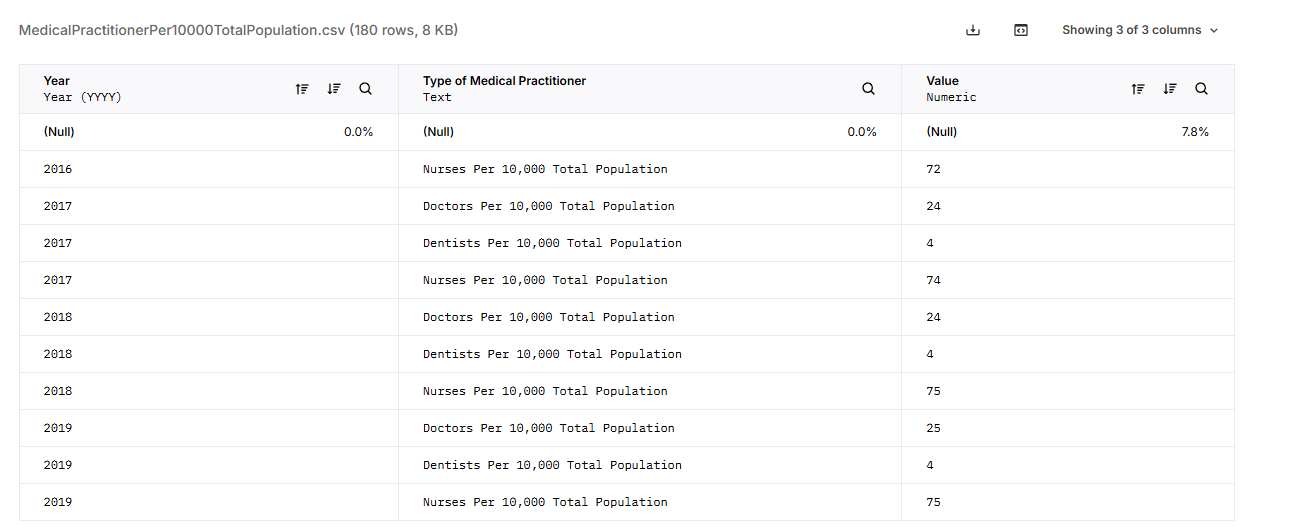

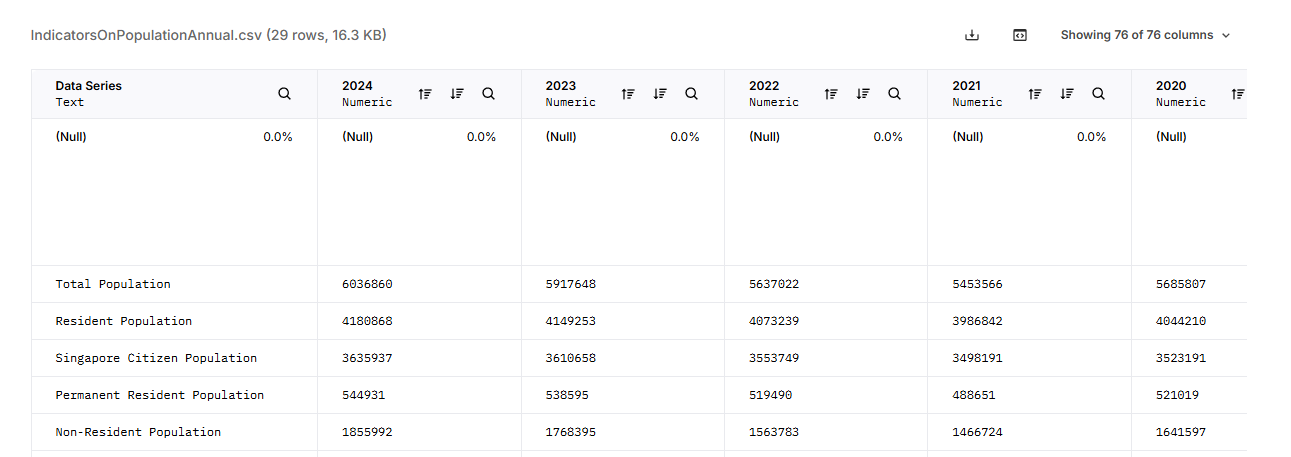

<h4>Problems with the dataset</h4>
<ul>
    <li> Most of the data start from 2009</li>
    <li> the nurses under "medical practioner" before 1973 does not have a data </li>
    <li> "professional Ratio To population" provide show inconsistency </li>
    <li> columns and rows for population need to be transpose</li>
    <li>inconsistency in the data, some data is present in 1000 and 10,000 while some data is just normal value</li>
</ul>

<h4>ways to tackle the issues</h4>
<ul>
    <li> filter out rows for the years that is before 2009</li>
    <li> the nurses under "medical practioner" before 1973 does not have a data </li>
    <li>convert all the data to fixed value </li>
    <li>joining "sg population dataset" to "professional Ratio To population" </li>
    <li> transpose columns and rows for population</li>
</ul>

<h2>Data cleaning/Feature Engineering </h2>

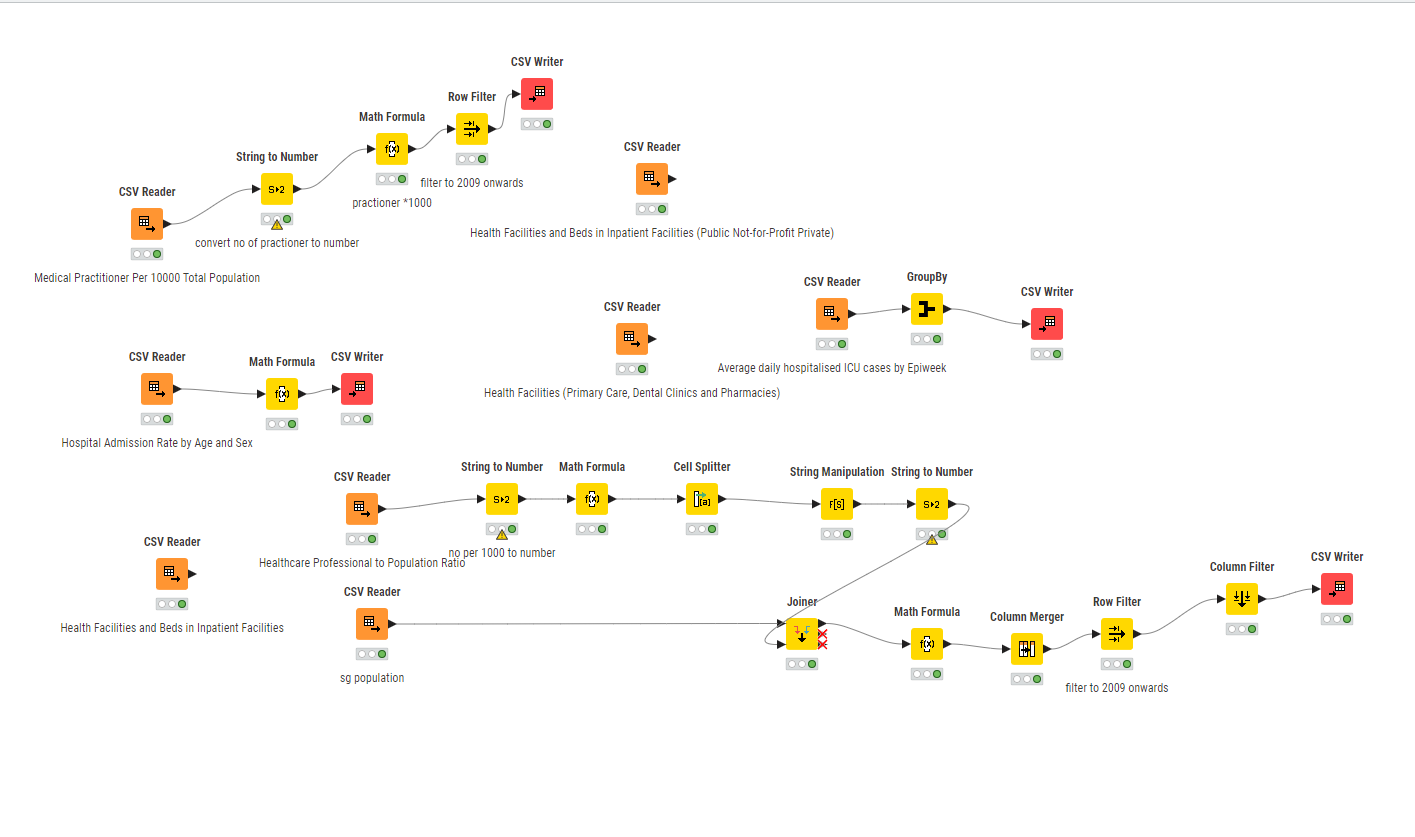

<h2>data analysis</h2>

In [5]:
import pandas as pd

medical_practioner_df = pd.read_csv("MedicalPractitionerPer10000TotalPopulation.csv")

admission_df = pd.read_csv("HospitalAdmissionRatebyAgeandSex.csv")


